In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam/spam.csv


In [96]:
df = pd.read_csv('/kaggle/input/sms-spam/spam.csv', encoding='latin1')


In [97]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2571,ham,Û_ and donÛ÷t worry weÛ÷ll have finished by march Û_ ish!,NaN,NaN,NaN
4351,ham,Hows the pain dear?y r u smiling?,NaN,NaN,NaN
877,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country Liverpool played in mid week? Txt ansr to 82277. å£1.50 SP:Tyrone,NaN,NaN,NaN
5181,ham,K sure am in my relatives home. Sms me de. Pls:-),NaN,NaN,NaN
5501,spam,PRIVATE! Your 2003 Account Statement for 07808247860 shows 800 un-redeemed S. I. M. points. Call 08719899229 Identifier Code: 40411 Expires 06/11/04,NaN,NaN,NaN


In [98]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [100]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [101]:
df.sample(5)

,v1,v2
3107,ham,Hello hun how ru? Its here by the way. Im good. Been on 2 dates with that guy i met in walkabout so far. We have to meet up soon. Hows everyone else?
2336,ham,"\Aww you must be nearly dead!Well Jez isComing over toDo some workAnd that whillTake forever!\"""""
5222,ham,5 nights...We nt staying at port step liao...Too ex
1159,ham,Yun buying... But school got offer 2000 plus only...
5260,ham,If anyone calls for a treadmill say you'll buy it. Make sure its working. I found an ad on Craigslist selling for $ &lt;#&gt; .


In [102]:
df.duplicated().sum()

403

In [103]:
df=df.drop_duplicates(keep='first')

In [104]:
#Rename the columns
df = df.rename(columns={'v1': 'target', 'v2': 'message'})

In [105]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [106]:
df.shape

(5169, 2)

# 2. EDA

In [107]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [108]:
df['target']=encoder.fit_transform(df['target'])

In [109]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [110]:
import matplotlib.pyplot as plt

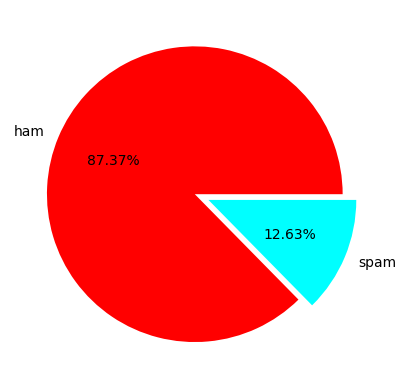

In [111]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0,0.1],shadow=False,colors=['red','cyan'])
plt.show()

In [112]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

##  By split() method

In [113]:
df1 = df.copy()

# Add new columns for num_characters, num_words, and num_sentences
df1['num_characters'] = df1['message'].apply(len)
df1['num_words'] = df1['message'].apply(lambda x: len(x.split()))
df1['num_sentences'] = df1['message'].apply(lambda x: len(x.split('.')))

In [114]:
df1.head()

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives around here though",61,13,1


## By NLTK method

In [115]:
import nltk


In [116]:
!pip install nltk

In [117]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [118]:
df['num_characters'] = df['message'].apply(len)
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [119]:
df.head()

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1


## Summary of Differences
### Accuracy: NLTK's tokenizers (word_tokenize and sent_tokenize) are generally more accurate and sophisticated than simple split() methods. They handle punctuation and special cases more effectively.
### Complexity: The split() method is simpler and faster but less accurate, especially for text with punctuation or abbreviations.
### Usage: Use NLTK's tokenizers when you need more accurate and reliable text processing. Use the split() method for simple, quick, and less precise text processing.

In [120]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [121]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [122]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

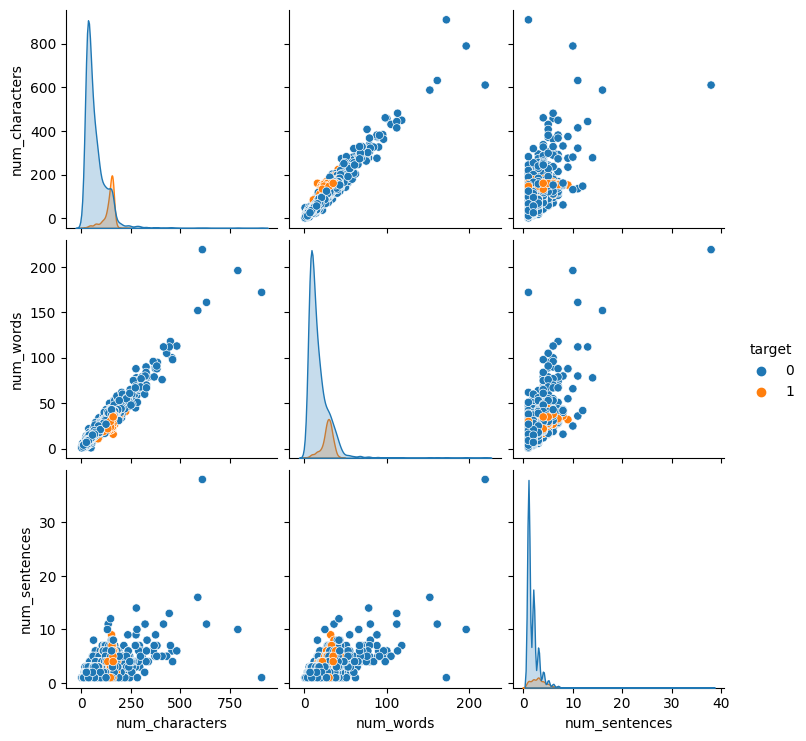

In [123]:
sns.pairplot(df,hue='target')

<Axes: >

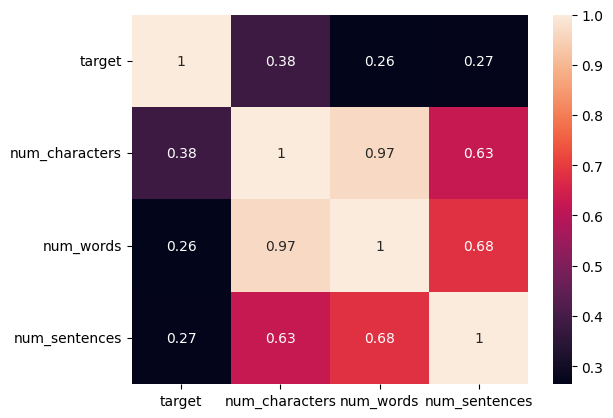

In [124]:
sns.heatmap(df[['target','num_characters', 'num_words', 'num_sentences']].corr(),annot=True)

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

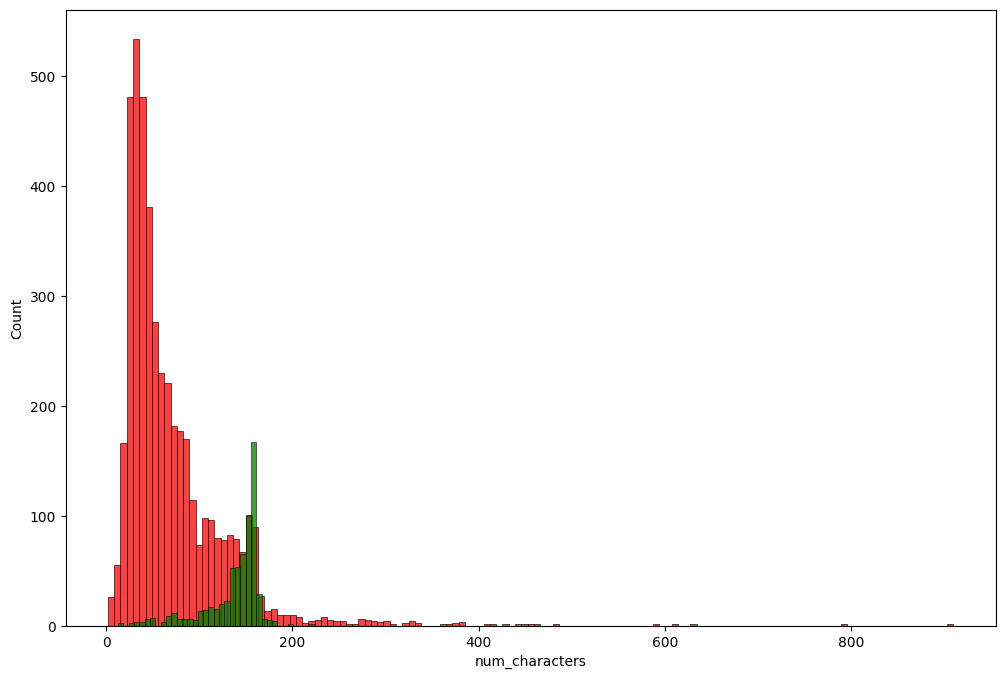

In [126]:
plt.figure(figsize=(12, 8))

sns.histplot(df[df['target']==0]['num_characters'],color='red')
sns.histplot(df[df['target']==1]['num_characters'],color='green')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

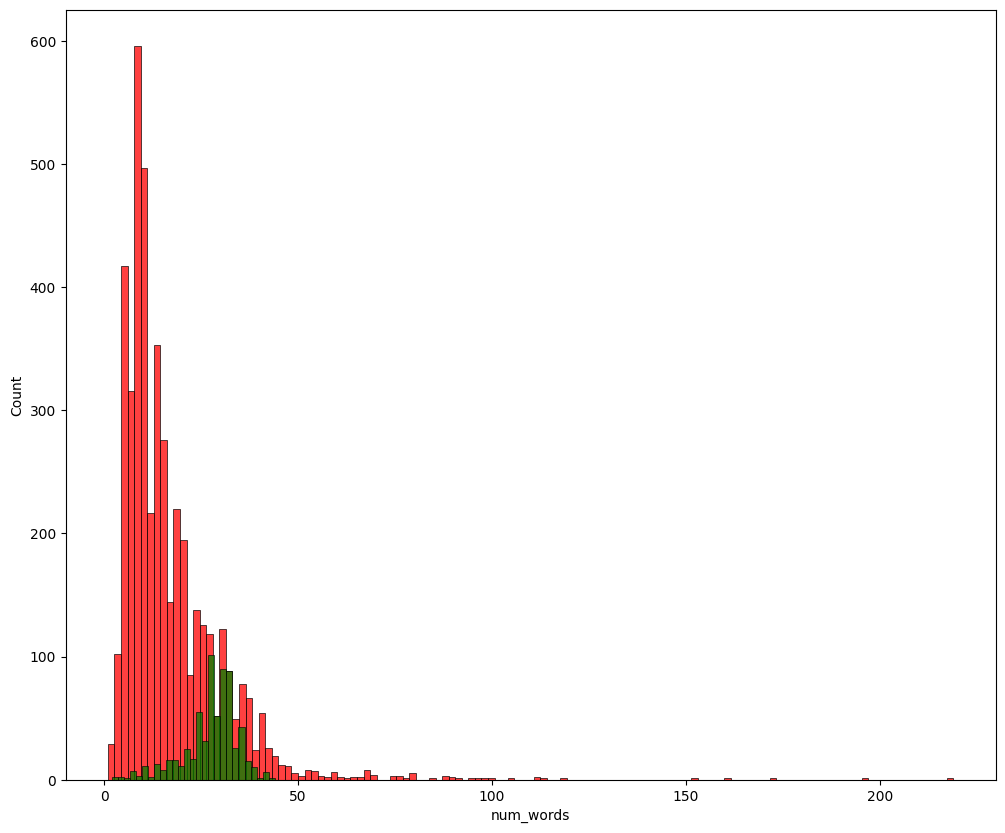

In [127]:
plt.figure(figsize=(12, 10))

sns.histplot(df[df['target']==0]['num_words'],color='red')
sns.histplot(df[df['target']==1]['num_words'],color='green')


In [128]:
df['num_sentences'].value_counts()

num_sentences
1     2598
2     1316
3      668
4      307
5      157
6       67
7       34
8        6
11       4
9        4
10       3
14       1
38       1
12       1
16       1
13       1
Name: count, dtype: int64

In [129]:
counts = df.groupby(['target', 'num_sentences']).size().unstack(fill_value=0)

<Figure size 1400x700 with 0 Axes>

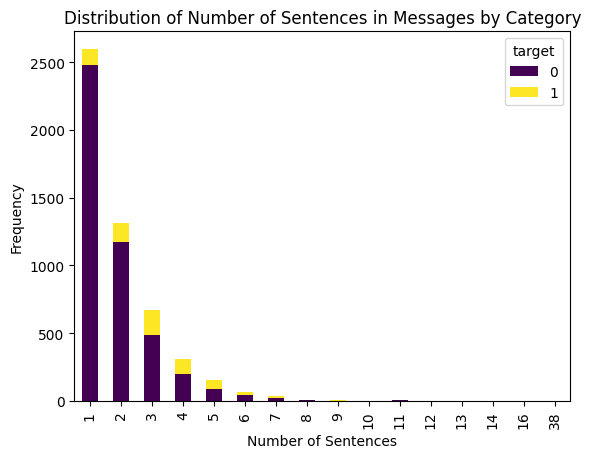

In [130]:
# Plot the bar plot
plt.figure(figsize=(14, 7))
counts.T.plot(kind='bar', stacked=True, colormap='viridis')

# Set plot title and labels
plt.title('Distribution of Number of Sentences in Messages by Category')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## 3. Data Preprocessing

In [131]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
import string

In [132]:

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [133]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [134]:
def preprocess_text(text):
    # Convert text to lowercase and remove punctuation
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Stemming
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in words]
    
    # Join stemmed words into a sentence
    processed_text = ' '.join(stemmed_words)
    
    return processed_text

# Apply preprocessing to the 'message' column in DataFrame
df['cleaned_message'] = df['message'].apply(preprocess_text)

print(df['cleaned_message'])

0                                                              go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1                                                                                                                     ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
3                                                                                                       u dun say earli hor u c alreadi say
4                                                                                                 nah dont think goe usf live around though
                                                                       ...                                                                 
5567                                   2nd time tri 2 contact u u pound prize 2 claim easi call 087187272008 now1 10p per minut btnationalr
5568                

In [135]:
# Ensure full display of columns
pd.set_option('display.max_colwidth', None)

In [136]:
df.head()

,target,message,num_characters,num_words,num_sentences,cleaned_message
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,23,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah dont think goe usf live around though


In [137]:
from wordcloud import WordCloud

In [138]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

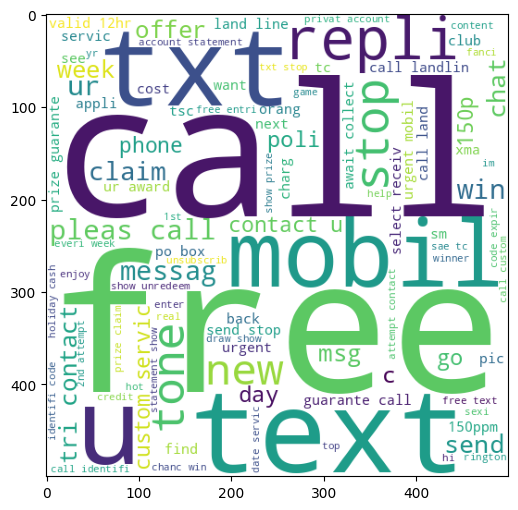

In [139]:
spam_wc = wc.generate(df[df['target'] == 1]['cleaned_message'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [140]:
ham_wc = wc.generate(df[df['target'] == 0]['cleaned_message'].str.cat(sep=" "))

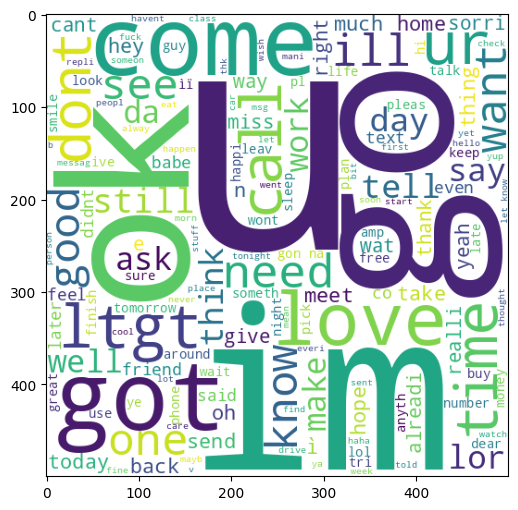

In [141]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [142]:
from collections import Counter

In [143]:
spam_corpus = []
for msg in df[df['target'] == 1]['cleaned_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [144]:
len(spam_corpus)

10547

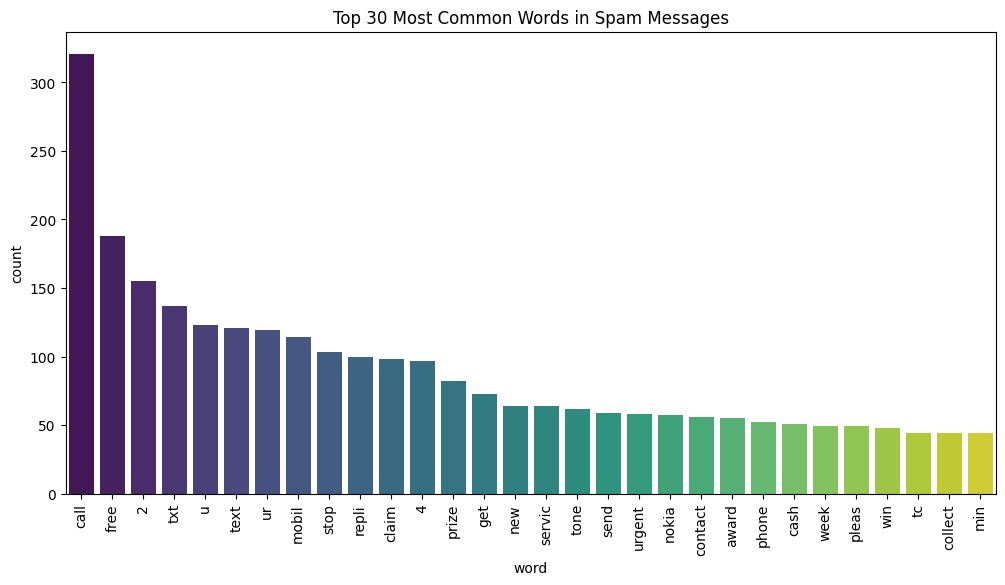

In [145]:
common_words = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the common words
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the barplot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=common_words_df, palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

In [146]:
ham_corpus = []
for msg in df[df['target'] == 0]['cleaned_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [147]:
len(ham_corpus)

36948

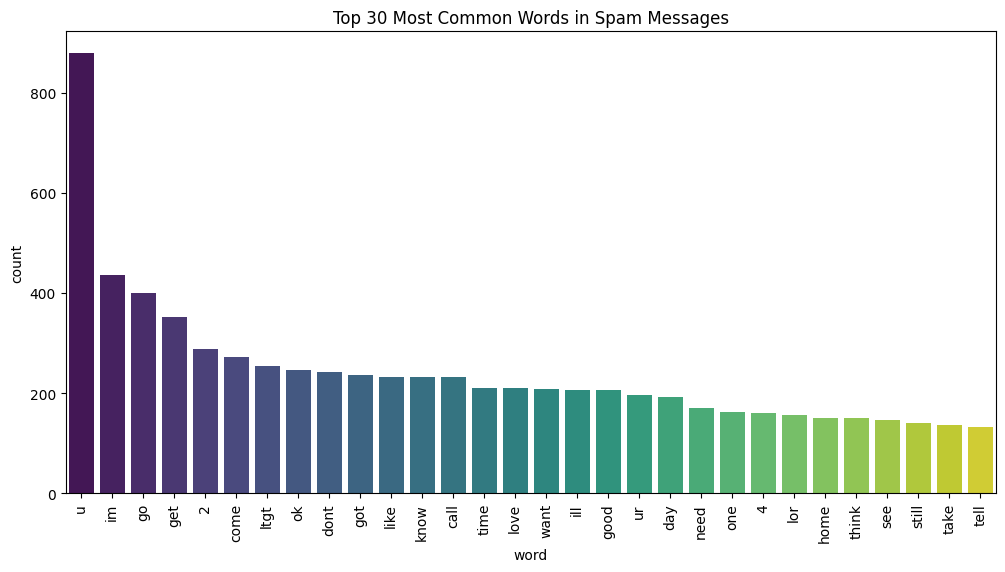

In [148]:
common_words = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the common words
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the barplot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=common_words_df, palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

## By using TF-IDF

In [149]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [150]:
X = tfidf.fit_transform(df['cleaned_message']).toarray()

In [151]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [152]:
y = df['target'].values

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [155]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [156]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [157]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8984526112185687
[[812  84]
 [ 21 117]]
0.582089552238806


In [158]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9429400386847195
[[896   0]
 [ 59  79]]
1.0


In [159]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[895   1]
 [ 20 118]]
0.9915966386554622


In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [161]:
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB()

In [162]:
clfs = {
    'SVC' : svc,
    'NB': mnb, 
    'LR': lrc
}

In [163]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [164]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
   # print("For ",name)
    #print("Accuracy - ",current_accuracy)
    #print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [166]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.942940,1.00000
2,LR,0.958414,0.93578
0,SVC,0.866538,0.00000


In [167]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

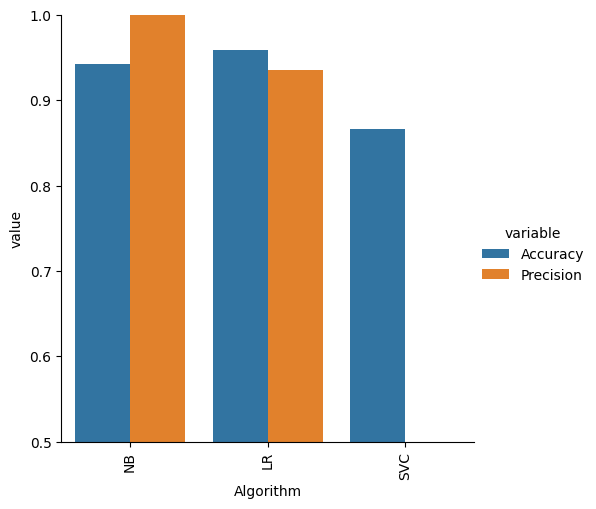

In [168]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [169]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.942940,1.00000,0.942940,1.00000,0.942940,1.00000,0.942940,1.00000
1,LR,0.958414,0.93578,0.958414,0.93578,0.958414,0.93578,0.958414,0.93578
2,SVC,0.866538,0.00000,0.866538,0.00000,0.866538,0.00000,0.866538,0.00000


In [170]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
